# KMeans Kümeleme Analizi

### KMeans kümeleme analizinde amaç, gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır, yani kümelerin içerisindeki homojenliği artırmaktır. 

<img src='https://miro.medium.com/max/1080/1*fz-rjYPPRlGEMdTI-RLbDg.png' alt='kmeans'>

### Yukarıdaki şekilde bazı gözlemler, birbirlerine olan yakınlıklarına göre çeşitli uzaklık metriklerini kullanılarak kümelere ayrılmıştır. Sınıflandırma problemlerinden farkı, sınıflandırma problemlerinin sınıflara ayrılmasıdır. Burada ise gözlemler birbirlerine olan benzerliklerine göre kümelere ayrılmaktadır. Yani kümeleme işlemlerinde sınıf bilgisi olmadığından gözlem birimleri kendi içerisinde birbirlerine olan benzerliklerine göre gruplara ayrılır.

### KMeans yöntemi nasıl çalışır?
* Adim 1: Küme sayısı belirlenir (örneğin 5 küme)
* Adim 2: Rastgele k adet merkez seçilir (dolayısıyla 5 merkez).
* Adim 3: Her gözlem için k merkezlere olan uzaklıklar hesaplanır.
* Adim 4: Her gözlem en yakın olan merkeze yani kümeye atanır.
* Adim 5: Atama merkezlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır. Bu adim oldukça kritiktir.
* Adim 6: Bu işlem, belirlenen bir iterasyon adedince tekrar edilir küme için hata kareler toplamlarının toplamının (total within-cluster variation) minimum olduğu durumdaki gözlemlerin kümelenme yapısı, nihai kümelenme olarak seçilir. 

### Küme yapısının belirlenmesi ve rastgele <strong>k</strong> adet merkez seçilmesi, bu yöntemin dezavantajlarıdır.


# Uygulama

## Kütüphaneleri import etme

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

## Veri setini import etme

In [36]:
df = pd.read_csv('/kaggle/input/us-arrests/us_arrests.csv', index_col=0)

#### Veri setinin sıfırıncı indeksinde indeks bilgisi olduğundan dolayı index_col = 0 yapılır.

## Veri setini anlama
### Veri setini kontrol etmek için check_dataframe fonksiyonunu kullanabilirsiniz.


In [55]:
def check_dataframe(dataframe, head=5):
    print("Dataset Info:".upper())
    display(dataframe.head(head))
    print("\nShape:", dataframe.shape)
    print("\nData Types:\n", dataframe.info())
    print("\nMissing Values:\n", dataframe.isnull().sum().sort_values(ascending=False),'\n')
    display("Descriptive Statistics:", dataframe.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_dataframe(df)

DATASET INFO:


,state,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,6
3,Arkansas,8.8,190,50,19.5,5
4,California,9.0,276,91,40.6,3



Shape: (50, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
 5   cluster   50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB

Data Types:
 None

Missing Values:
 state       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
cluster     0
dtype: int64 



'Descriptive Statistics:'

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
Murder,50.0,7.788,4.355510,0.8,2.145,2.56,4.075,7.25,11.250,13.32,15.400,16.763,17.4
Assault,50.0,170.760,83.337661,45.0,50.250,56.90,109.000,159.00,249.000,279.60,297.300,336.020,337.0
UrbanPop,50.0,65.540,14.474763,32.0,44.000,45.00,54.500,66.00,77.750,83.20,86.550,90.020,91.0
Rape,50.0,21.232,9.366385,7.3,8.750,10.67,15.075,20.10,26.175,32.40,39.745,45.265,46.0
cluster,50.0,3.700,1.705334,1.0,1.000,1.00,2.000,4.00,5.000,6.00,6.000,6.000,6.0


## Verilerin standartlaştırılması

### Uzaklık ve gradient descent temelli yöntemlerin kullanımındaki süreçlerde değişkenlerin standartlaştırılması önemlidir. Dolayısıyla buradaki değişkenlerde standartlaştırılmalıdır. Verileri 0-1 arasındaki değerlere dönüştürmek için MinMaxScaler kullanabilirsiniz.

In [38]:
mms = MinMaxScaler(feature_range=(0, 1))
df = mms.fit_transform(df)  # Bu islem sonrasinda numpy arrayi elde edilir.
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

### Veriler, fit_trasnform() prosesinden çıktıktan sonra numpy arrayine dönüştürülür. Dolayısıyla ilk 5 gözleme bakmak için df[0:5] kullanılır.

## Model kurma

In [39]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)

### Model kurma işlemi tamamlandıktan sonra modelin hiperparametreleri get_params() metodunun kullanarak elde edilir.

In [40]:
print(f'KMeans modelinin hiperparemetreleri: \n{kmeans.get_params()}')

KMeans modelinin hiperparemetreleri: 
{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 4, 'n_init': 10, 'random_state': 0, 'tol': 0.0001, 'verbose': 0}


### Yukarıdaki parametrelere göre dışarıdan ayarlanması gereken en önemli hiperparametre n_clusters'tir. Küme sayları aşağıdaki kodlama kullanılarak elde edilebilir.

In [41]:
print(f"KMeans modelinin küme sayısı: {kmeans.n_clusters}'tür.")

KMeans modelinin küme sayısı: 4'tür.


### Küme merkezlerini belirleme

#### Küme merkezlerini belirlemek için aşağıdaki kodlama kullanılır. Nihai olarak belirlenen 4 kümenin merkezleri gelir. Yani standartlaştırılmış değerlerdeki birer gözlem birimidir.


In [42]:
print(f'KMeans modelinin küme merkezleri: \n{kmeans.cluster_centers_}')

KMeans modelinin küme merkezleri: 
[[0.6124498  0.75       0.75423729 0.67980189]
 [0.30439405 0.32937147 0.70588235 0.31098951]
 [0.79141566 0.6802226  0.36864407 0.36466408]
 [0.1686747  0.11485774 0.34028683 0.12601868]]


### Belirlenen kümelerin küme etiketlerini (labels) getirme

#### Bu işlem aşağıdaki gibi yapılır. Elde edilen sonuca göre 0'dan 3'e kadar 4 küme/labels vardir. 0, ilk kümeyi, 3 ise son kümeyi temsil eder. Dolayısıyla bunlar, veri setindeki her bir gözlemin kmeans modeli tarafından belirlenen kümeleridir.


In [43]:
print(f'Belirlenen kümelerin küme etiketleri: \n{kmeans.labels_}')

Belirlenen kümelerin küme etiketleri: 
[2 0 0 2 0 0 1 1 0 2 1 3 0 1 3 1 3 2 3 0 1 0 3 2 1 3 3 0 3 1 0 0 2 3 1 1 1
 1 1 2 3 2 0 1 3 1 1 3 3 1]


## Hata değerlerini (SSD, SSE, SSR) hesaplama

#### Bu işlem için inertia_ metodu kullanılır. inertia_, örneklerin en yakın küme merkezine olan uzaklıklarının karelerinin toplamını ifade eder.


In [44]:
print(f"KMeans modelinin hatası: {round(kmeans.inertia_, 2)}'dir.")

KMeans modelinin hatası: 3.68'dir.


## Optimum küme sayısını belirleme

### n_clusters hiperparametresinin ön tanımlı değeri 8'dir. Öyle bir işlem yapılmalı ki farklı k parametre değerlerine göre SSD incelenmeli ve SSD'ye göre karar verilmelidir. Bu işlem aşağıdaki gibidir.


Text(0.5, 0, 'K değerleri')

Text(0, 0.5, 'SSD')

Text(0.5, 1.0, 'Elbow Methodu ile SSD değerlerini görselleştirme')

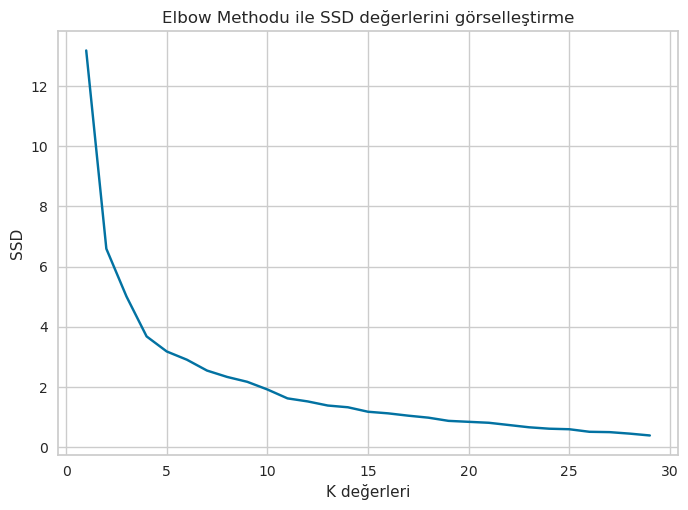

In [45]:
kmeans = KMeans()   # boş bir KMeans nesnesi oluşturma
ssd = []            # ssd isimli bos bir liste oluşturma
K = range(1, 30)    # 1'den 30'a kadar K değerlerini oluşturma

# Döngü aracılığıyla işlemleri gerçekleştirme
for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

# ssd değerlerini görselleştirme
plt.plot(K, ssd)
plt.xlabel('K değerleri')
plt.ylabel('SSD')
plt.title('Elbow Methodu ile SSD değerlerini görselleştirme')
plt.show()

### Yukarıdaki grafiğe göre, küme sayısı arttıkça SSD değerleri azalır. Dolayısıyla burada bir karar vermek gerekirse k değeri 5 olarak belirlenebilir. Gözlem birimi kadar küme olduğunda SSD değeri sıfır olur. Çünkü bütün gözlem birimleri bir küme ve her bir gözlem birimi de bir merkez olur. Dolayısıyla SSD=0 olur. Küme sayısı arttıkça hatanın düşmesi beklenir. Bu durumda ne yapılmalıdır? Pratikte gözlem birimlerinin hepsiyle belirli bir hareket tarzı, aksiyonu gerçekleştirilemediğinden dolayı kümelere ayırmak istediğimiz için organik olarak 3, 4, 5, belki 7, 8 gibi küme olması gerekir ki bu gruplara göre hareket edilmesi gerekir. Öte yandan, KMeans ve Hiyerarşik kümeleme gibi yöntemler kullanılırken algoritmanın verdiği referanslara göre (SSD) olan küme sayılarına doğrudan bakılarak işlem yapılmamalıdır. Çalışmanın başında is bilgisi de ne kadar küme yapılacağı hakkında ön fikir olmalıdır. Bu duruda matematiksel temeller için makine öğrenmesi modelleri kullanılır. Örneğin, veri setinde 40 tane değişkenin olduğunu ve bu değişkenleri kullanarak kümeleme yapılması gerektiğini düşünelim. Ancak, kümelemeyi göz yordamıyla yapmak mümkün değildir. O yüzden matematiksel bir metot gerekmektedir. Dolayısıyla kümeleme yöntemlerinden biri olan KMeans yöntemi kullanılabilir. Yukarıdaki sekil, merkez sayısını belirlemede bir sinyal vermektedir. Ancak, bu kesin olarak belirlenemeyebilir. Bu durumda optimum noktayı belirlemek için aşağıdaki yöntem kullanılabilir. 

### ElbowVisualizer yöntemine göre optimum küme sayısını belirleme


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=19), k=(2, 20))

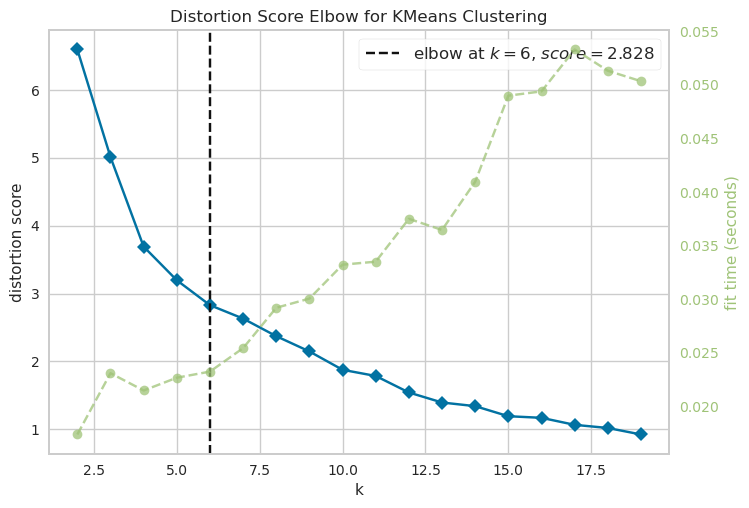

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

### Optimum k değerini elde etme

In [47]:
print(f"Optimum k değeri: {elbow.elbow_value_}'dir.")

Optimum k değeri: 6'dir.


## KMeans final modeli
### Final kümelerinin oluşturulması


In [48]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)
print(f'Küme sayısı: {kmeans.n_clusters}.\n')
print(f'Küme merkezleri: \n{kmeans.cluster_centers_}\n')
print(f'Küme etiketleri: \n{kmeans.labels_}')   # 0'dan 5'e kadar küme olusturulur.

Küme sayısı: 6.

Küme merkezleri: 
[[0.22289157 0.24657534 0.81144068 0.22286822]
 [0.83562823 0.70645793 0.37772397 0.37172388]
 [0.5686747  0.70205479 0.71864407 0.87028424]
 [0.11311914 0.08523592 0.29378531 0.08182601]
 [0.3605852  0.34637965 0.54237288 0.3372093 ]
 [0.64371773 0.78424658 0.77966102 0.54374308]]

Küme etiketleri: 
[1 2 5 4 2 2 0 4 5 1 0 3 5 4 3 4 4 1 3 5 0 2 0 1 4 4 4 2 3 0 5 5 1 3 4 4 4
 0 0 1 3 1 5 0 3 4 4 3 3 4]


### Hangi gözlem biriminin hangi kümeye ait olduğunu belirleme

In [49]:
clusters_kmeans = kmeans.labels_
df = pd.read_csv('/kaggle/input/us-arrests/us_arrests.csv', index_col=0)
df['cluster'] = clusters_kmeans + 1     # veri setine yeni değişken ekleme
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,6
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,3


### Hangi eyaletin hangi kümeye ait olduğunu belirleme

In [50]:
df = df.reset_index()
df.rename(columns = {'index':'state'}, inplace = True)
for i in df['cluster'].unique():
    print(f'\nKüme numarasi {i} olan eyaletler')
    print(df['state'][df['cluster'] == i])


Küme numarasi 2 olan eyaletler
0            Alabama
9            Georgia
17         Louisiana
23       Mississippi
32    North Carolina
39    South Carolina
41         Tennessee
Name: state, dtype: object

Küme numarasi 3 olan eyaletler
1         Alaska
4     California
5       Colorado
21      Michigan
27        Nevada
Name: state, dtype: object

Küme numarasi 6 olan eyaletler
2        Arizona
8        Florida
12      Illinois
19      Maryland
30    New Mexico
31      New York
42         Texas
Name: state, dtype: object

Küme numarasi 5 olan eyaletler
3       Arkansas
7       Delaware
13       Indiana
15        Kansas
16      Kentucky
24      Missouri
25       Montana
26      Nebraska
34          Ohio
35      Oklahoma
36        Oregon
45      Virginia
46    Washington
49       Wyoming
Name: state, dtype: object

Küme numarasi 1 olan eyaletler
6       Connecticut
10           Hawaii
20    Massachusetts
22        Minnesota
29       New Jersey
37     Pennsylvania
38     Rhode Island
43 

### KMeans kümelemede segmentler neye göre oluşturulur?
#### K-Means kümeleme, verilerin özelliklerine göre yapılan ölçümlerle benzer verilerin aynı kümede toplanmasını sağlar. Bununla beraber, değişkenler standardize edilmektedir. Bu sayede verilerin segmentler halinde gruplandırılması ve farklı özelliklere sahip verilerin ayrılması mümkün olur.

In [51]:
df.groupby('cluster').agg(['count', 'mean', 'median'])

Murder                   Assault                    UrbanPop                    Rape                  
         count       mean median   count        mean median    count       mean median count       mean median
cluster                                                                                                       
1            8   4.500000    3.9       8  117.000000  115.0        8  79.875000   81.5     8  15.925000  15.60
2            7  14.671429   14.4       7  251.285714  249.0        7  54.285714   58.0     7  21.685714  22.20
3            5  10.240000   10.0       5  250.000000  255.0        5  74.400000   78.0     5  40.980000  40.60
4            9   2.677778    2.2       9   69.888889   57.0        9  49.333333   51.0     9  10.466667  10.80
5           14   6.785714    6.7      14  146.142857  148.0       14  64.000000   65.5    14  20.350000  19.75
6            7  11.485714   11.3       7  274.000000  285.0        7  78.000000   80.0     7  28.342857  27.80

### Yukarıdaki tablo, bir veri kümesinin K-Means kümeleme algoritması kullanılarak 6 farklı küme (cluster) halinde segmentlere ayrılması sonucunu göstermektedir. Kümeleme işlemi, dört farklı özellik (Murder, Assault, UrbanPop, Rape) üzerinde gerçekleştirilmiştir. Tabloda her küme için özelliklerin sayısı, ortalaması ve medyanı verilmiştir.

* "count" sütunu, her bir kümede kaç adet verinin olduğunu göstermektedir.
* "mean" sütunu, her bir kümenin o özellik için ortalama değerini vermektedir.
* "median" sütunu, her bir kümenin o özellik için ortanca değerini vermektedir.

### Örneğin, "cluster 1" için Murder özelliği için ortalama değer 2.68, medyan değeri 2.4 olarak belirtilmiştir. Bu kümede 10 veri bulunmaktadır. Aynı şekilde Assault özelliği için ortalama değer 70.1, medyan değeri 64.5'tir. UrbanPop özelliği için ortalama değer 51.0, medyan değeri 52.5'tir. Rape özelliği için ise ortalama değer 10.91, medyan değeri 11.0 olarak belirtilmiştir. Benzer yorumlar diğer kümeler için de yapılabilir.

### Öte yandan, yukarıdaki tablo, verilerin farklı özelliklerine göre kümelere ayrılmasını göstermektedir. Her bir kümenin özelliklerinin ortalaması ve medyanı, bu kümenin diğer kümelere göre nasıl bir farklılık gösterdiğini anlamak için kullanılabilir. Örneğin, "cluster 2" Assault özelliği için ortalama değeri en yüksek kümedir. Benzer şekilde, "cluster 6" Rape özelliği için en yüksek ortalama değere sahip kümedir.

# Thank you for checking my notebook!